In [1]:
import openml
from openml.tasks import list_tasks, TaskType
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import Dynaforest
from Dynaforest import Dynatree
import logging



# Load the OpenML dataset
regression_tasks = list_tasks(task_type = TaskType.SUPERVISED_REGRESSION)
small_tasks_ids = []
for task_id, task_value in regression_tasks.items():
    if ('NumberOfInstances' in task_value.keys() and task_value['NumberOfInstances'] < 10000 and task_value['NumberOfInstances'] > 5000 and 
    'NumberOfMissingValues' in task_value.keys() and task_value['NumberOfMissingValues'] == 0 and 
    'NumberOfSymbolicFeatures' in task_value.keys() and task_value['NumberOfSymbolicFeatures'] == 0):
        small_tasks_ids.append(task_id)

In [2]:
logging.getLogger("openml.extensions.sklearn.extension").setLevel(logging.ERROR)
if not hasattr(Dynaforest, '__version__'):
    Dynaforest.__version__ = "0.0.1"  # Use an appropriate version number

task_id = small_tasks_ids[0]
task = openml.tasks.get_task(task_id)

"""Dynaforest = Dynatree(n_trees = 50, window = 5, max_depth=4, min_samples = 2, feature_subsampling_pct=0.9, 
                      delta=0.1)
RF = RandomForestRegressor(n_estimators=50, max_depth=4)
XGB = XGBRegressor(n_estimators=50, max_depth=4)

# Run your custom model on the task
run_my = openml.runs.run_model_on_task(Dynaforest, task, avoid_duplicate_runs=False)

# Run RandomForest
run_rf = openml.runs.run_model_on_task(RF, task, avoid_duplicate_runs=False)

# Run XGBoost
run_xgb = openml.runs.run_model_on_task(XGB, task, avoid_duplicate_runs=False)

dyna_mae = run_my.fold_evaluations.get("mean_absolute_error")
my_mae = sum(dyna_mae[0].values()) / len(dyna_mae)
rf_mae = run_rf.fold_evaluations.get("mean_absolute_error")
avg_rf_mae = sum(rf_mae[0].values()) / len(rf_mae)
xgb_mae = run_xgb.fold_evaluations.get("mean_absolute_error")
avg_xgb_mae = sum(xgb_mae[0].values()) / len(xgb_mae)

print(f"Task {task_id} - Mean Absolute Error:")
print(f"    MyRegressor: {my_mae:.4f}")
print(f"    RandomForest: {avg_rf_mae}")
print(f"    XGBoost: {avg_xgb_mae}")"""

'Dynaforest = Dynatree(n_trees = 50, window = 5, max_depth=4, min_samples = 2, feature_subsampling_pct=0.9, \n                      delta=0.1)\nRF = RandomForestRegressor(n_estimators=50, max_depth=4)\nXGB = XGBRegressor(n_estimators=50, max_depth=4)\n\n# Run your custom model on the task\nrun_my = openml.runs.run_model_on_task(Dynaforest, task, avoid_duplicate_runs=False)\n\n# Run RandomForest\nrun_rf = openml.runs.run_model_on_task(RF, task, avoid_duplicate_runs=False)\n\n# Run XGBoost\nrun_xgb = openml.runs.run_model_on_task(XGB, task, avoid_duplicate_runs=False)\n\ndyna_mae = run_my.fold_evaluations.get("mean_absolute_error")\nmy_mae = sum(dyna_mae[0].values()) / len(dyna_mae)\nrf_mae = run_rf.fold_evaluations.get("mean_absolute_error")\navg_rf_mae = sum(rf_mae[0].values()) / len(rf_mae)\nxgb_mae = run_xgb.fold_evaluations.get("mean_absolute_error")\navg_xgb_mae = sum(xgb_mae[0].values()) / len(xgb_mae)\n\nprint(f"Task {task_id} - Mean Absolute Error:")\nprint(f"    MyRegressor: {m

In [3]:
import numpy as np
#Read in numpynp.array
error_array = np.load("errors.npy")


print(f"Errors for Random forest: {np.mean(error_array[:, 0])}")
print(f"Errors for XGBoost: {np.mean(error_array[:, 1])}")
print(f"Errors for Dynatree: {np.mean(error_array[:, 2])}")

print(f"Percent of time Dynatree is better than Random Forest: {np.mean(error_array[:, 2] < error_array[:, 0])}")
print(f"Percent of time Dynatree is better than XGBoost: {np.mean(error_array[:, 2] < error_array[:, 1])}")

print(f"Average relative improvement of Dynatree over Random Forest: {np.mean((error_array[:, 0] - error_array[:, 2]) / error_array[:, 0])}")
print(f"Average relative improvement of Dynatree over XGBoost: {np.mean((error_array[:, 1] - error_array[:, 2]) / error_array[:, 1])}")

Errors for Random forest: 0.1547599921933264
Errors for XGBoost: 0.14811790130391508
Errors for Dynatree: 0.15561080227000038
Percent of time Dynatree is better than Random Forest: 0.0
Percent of time Dynatree is better than XGBoost: 0.0
Average relative improvement of Dynatree over Random Forest: -0.005497609974102008
Average relative improvement of Dynatree over XGBoost: -0.05058740976022213


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

task_id = small_tasks_ids[0]
task = openml.tasks.get_task(task_id)
X, y = task.get_X_and_y()

dynatree_params = {"delta": 0.3,
            "feature_subsampling_pct": 0.6,
            "max_depth": 3,
            "min_samples": 7,
            "n_trees": 80,
            "window": "sqrt"}

dyna = Dynatree(**dynatree_params)
"""rf_params = {
            "max_depth": 5,
            "max_features": 0.50,
            "min_samples_leaf": 3,
            "n_estimators": 68}
dyna = RandomForestRegressor(**rf_params)"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
dyna.fit(X_train, y_train)
train_error = mean_absolute_error(y_train, dyna.predict(X_train))
test_error = mean_absolute_error(y_test, dyna.predict(X_test))
print(f"Train error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")

In [19]:
1/16

0.0625

In [51]:
trees = dyna._trees
predictions = [tree.predict(X_test) for tree in trees]
tree_biases = np.mean(predictions - y_test, axis = 1)
correlations = np.zeros((len(trees), len(trees)))
for i in range(len(trees)):
    for j in range(i, len(trees)):
        correlations[i, j] = np.corrcoef(predictions[i], predictions[j])[0, 1]
        correlations[j, i] = correlations[i, j]
print(f"Correlations: {np.mean(correlations)}")
print(f"Tree biases: {np.mean(tree_biases)}")

Correlations: 0.3255690764399889
Tree biases: 0.0037076202661793485


In [6]:
trees = dyna.estimators_
predictions = [tree.predict(X_test) for tree in trees]
tree_biases = np.mean(predictions - y_test, axis = 1)
correlations = np.zeros((len(trees), len(trees)))
for i in range(len(trees)):
    for j in range(i, len(trees)):
        correlations[i, j] = np.corrcoef(predictions[i], predictions[j])[0, 1]
        correlations[j, i] = correlations[i, j]
print(f"Correlations: {np.mean(correlations)}")
print(f"Tree biases: {np.mean(tree_biases)}")

AttributeError: 'Dynatree' object has no attribute 'estimators_'

Mean correlation among tree predictions: 0.2321
Mean correlation among tree residuals: 0.2853
Average individual tree MSE: 0.1082
Ensemble MSE: 0.0317
Average individual tree MAE: 0.2571
Ensemble MAE: 0.1430
Average variance of tree predictions across samples: 0.0766
Ambiguity (Average tree MSE - Ensemble MSE): 0.0766
Not all trees have a 'feature_importances_' attribute.


/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


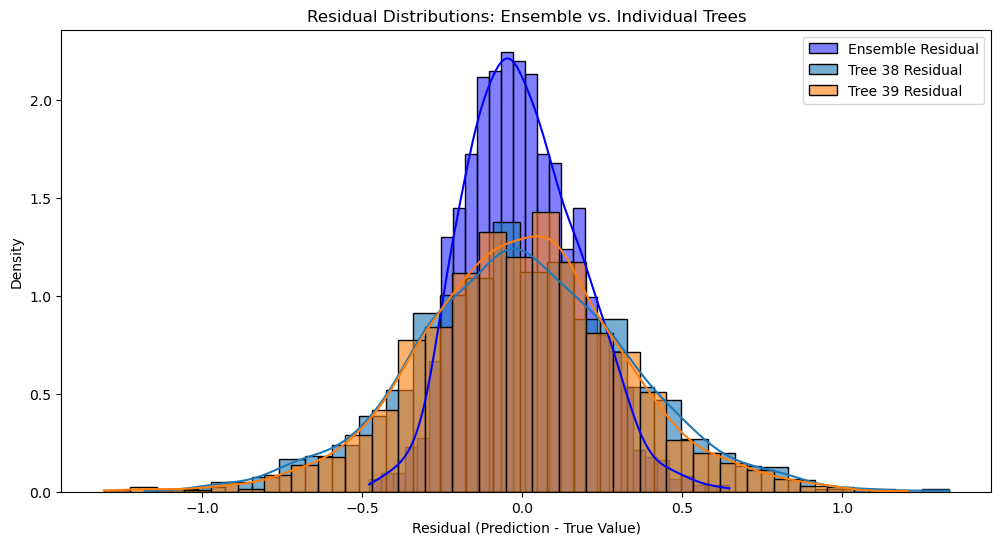

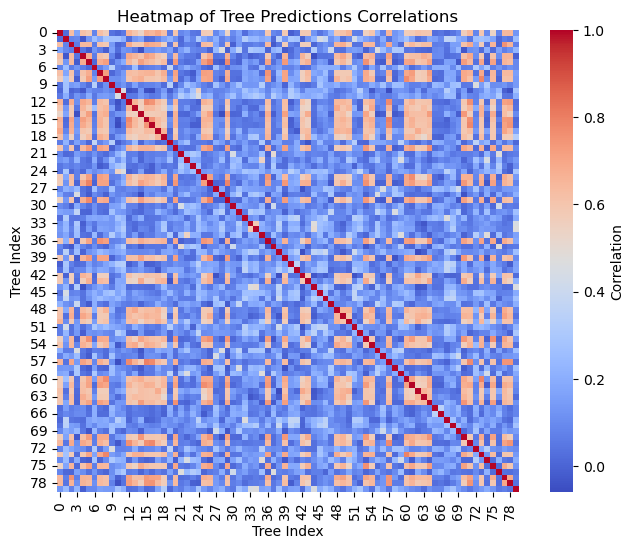

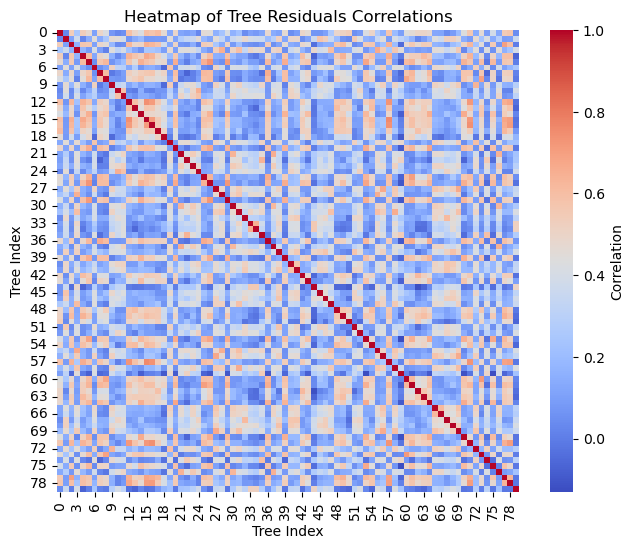

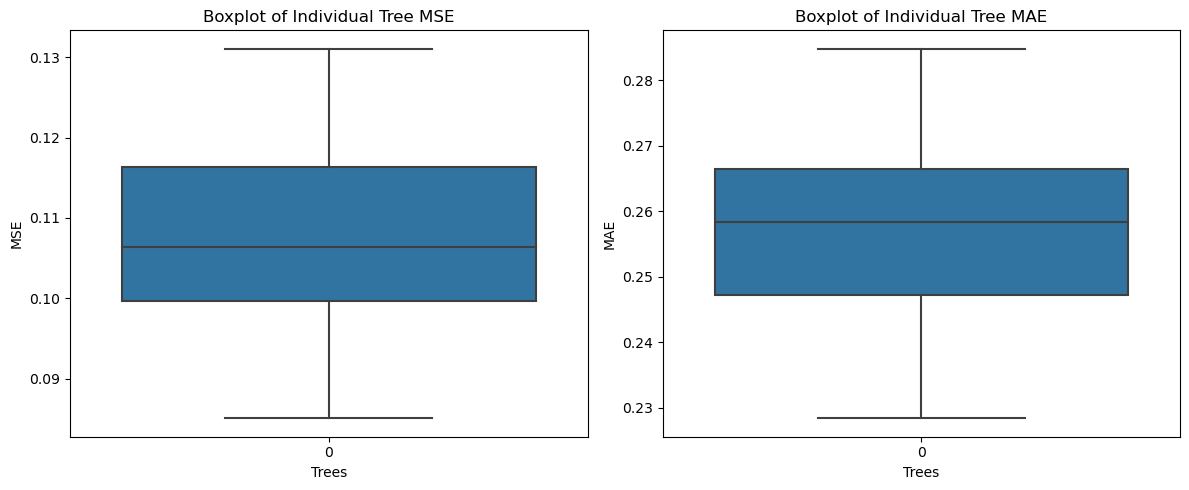

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -------------------------------
# Assumptions:
#   - dyna: your trained random forest model (e.g., RandomForestRegressor)
#           with an attribute `estimators_` (list of individual tree models)
#   - X_test: test features (numpynp.array or similar)
#   - y_test: true test targets (numpynp.array)
#
# Replace the following dummy definitions with your actual data/model.
# -------------------------------
# Example (comment these out if you already have these defined):
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
#
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# dyna = RandomForestRegressor(n_estimators=50, random_state=42)
# dyna.fit(X_train, y_train)

# -------------------------------
# 1. Compute Predictions for Each Tree
# -------------------------------
trees = dyna._trees
n_trees = len(trees)
# Each tree produces predictions on the test set; shape: (n_trees, n_samples)
predictions = np.array([tree.predict(X_test) for tree in trees])

# Ensemble prediction is the average over trees:
ensemble_pred = np.mean(predictions, axis=0)

# -------------------------------
# 2. Compute Residuals (Errors)
# -------------------------------
# Residuals for each tree and for the ensemble:
residuals = predictions - y_test  # shape: (n_trees, n_samples)
ensemble_residual = ensemble_pred - y_test

# -------------------------------
# 3. Correlation Among Tree Predictions
# -------------------------------
# Compute the correlation matrix among the trees’ predictions.
correlation_matrix = np.corrcoef(predictions)
# Compute the mean correlation (using only the off-diagonal values)
upper_tri_indices = np.triu_indices(n_trees, k=1)
mean_correlation = np.mean(correlation_matrix[upper_tri_indices])
print("Mean correlation among tree predictions: {:.4f}".format(mean_correlation))

# -------------------------------
# 4. Correlation Among Tree Residuals
# -------------------------------
resid_corr_matrix = np.corrcoef(residuals)
mean_resid_corr = np.mean(resid_corr_matrix[upper_tri_indices])
print("Mean correlation among tree residuals: {:.4f}".format(mean_resid_corr))

# -------------------------------
# 5. Compute MSE and MAE for Each Tree and the Ensemble
# -------------------------------
tree_mse = np.array([mean_squared_error(y_test, predictions[i]) for i in range(n_trees)])
tree_mae = np.array([mean_absolute_error(y_test, predictions[i]) for i in range(n_trees)])
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)

print("Average individual tree MSE: {:.4f}".format(np.mean(tree_mse)))
print("Ensemble MSE: {:.4f}".format(ensemble_mse))
print("Average individual tree MAE: {:.4f}".format(np.mean(tree_mae)))
print("Ensemble MAE: {:.4f}".format(ensemble_mae))

# -------------------------------
# 6. Compute Prediction Variance Across Trees (Per Sample)
# -------------------------------
# For each test sample, compute variance among the tree predictions
variance_per_sample = np.var(predictions, axis=0)
avg_prediction_variance = np.mean(variance_per_sample)
print("Average variance of tree predictions across samples: {:.4f}".format(avg_prediction_variance))

# -------------------------------
# 7. Ambiguity Decomposition (Regression)
# -------------------------------
# One way to look at ensemble benefits is via the ambiguity decomposition:
#   Ensemble MSE = Average tree MSE - Ambiguity
ambiguity = np.mean(tree_mse) - ensemble_mse
print("Ambiguity (Average tree MSE - Ensemble MSE): {:.4f}".format(ambiguity))

# -------------------------------
# 8. Feature Importances (If Available)
# -------------------------------
# If your individual trees have a `feature_importances_` attribute,
# compute the average importance for each feature.
try:
    feature_importances = np.array([tree.feature_importances_ for tree in trees])
    avg_feature_importance = np.mean(feature_importances, axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(avg_feature_importance)), avg_feature_importance, color='skyblue')
    plt.xlabel("Feature Index")
    plt.ylabel("Average Feature Importance")
    plt.title("Average Feature Importances Across Trees")
    plt.show()
except AttributeError:
    print("Not all trees have a 'feature_importances_' attribute.")

# -------------------------------
# 9. Plot Distribution of Residuals
# -------------------------------
plt.figure(figsize=(12, 6))
# Plot ensemble residual distribution
sns.histplot(ensemble_residual, color="blue", label="Ensemble Residual", kde=True, stat="density", bins=30)

# Plot residual distributions for a few individual trees (first 3 trees)
for i in [38, 39]:
    sns.histplot(residuals[i], kde=True, stat="density", bins=30, label=f"Tree {i} Residual", alpha=0.6)
    
plt.xlabel("Residual (Prediction - True Value)")
plt.ylabel("Density")
plt.title("Residual Distributions: Ensemble vs. Individual Trees")
plt.legend()
plt.show()

# -------------------------------
# 10. Correlation Heatmap for Tree Predictions
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'})
plt.title("Heatmap of Tree Predictions Correlations")
plt.xlabel("Tree Index")
plt.ylabel("Tree Index")
plt.show()

# -------------------------------
# 11. Correlation Heatmap for Tree Residuals
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(resid_corr_matrix, cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'})
plt.title("Heatmap of Tree Residuals Correlations")
plt.xlabel("Tree Index")
plt.ylabel("Tree Index")
plt.show()

# -------------------------------
# 12. Boxplots for Individual Tree MSE and MAE
# -------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=tree_mse)
plt.title("Boxplot of Individual Tree MSE")
plt.xlabel("Trees")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
sns.boxplot(data=tree_mae)
plt.title("Boxplot of Individual Tree MAE")
plt.xlabel("Trees")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()


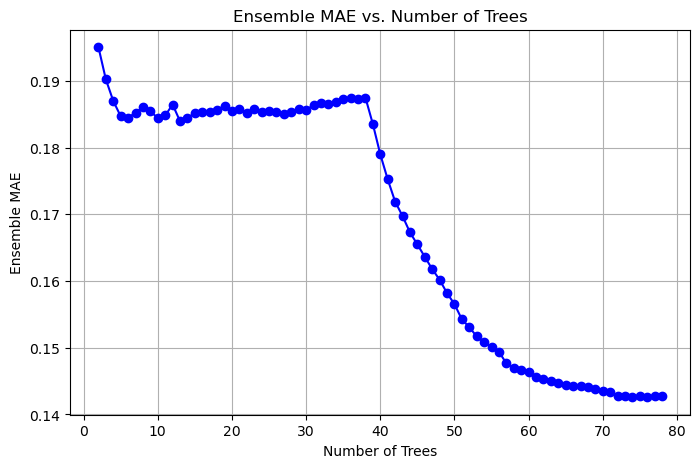

In [78]:
trees = dyna._trees
predictions = np.array([tree.predict(X_train) for tree in trees])
tree_mse = np.array([mean_squared_error(y_train, predictions[i]) for i in range(n_trees)])
best_tree_idxs = np.argsort(tree_mse)
errors = []
for num_trees in range(2, 79):    
    tree_list = [trees[i] for i in best_tree_idxs][:num_trees]
    predictions_test = np.array([tree.predict(X_test) for tree in tree_list])
    ensemble_pred = np.mean(predictions_test, axis=0)
    ensemble_mse = mean_squared_error(y_test, ensemble_pred)
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    errors.append(ensemble_mae)

# Plot the error as a function of the number of trees
plt.figure(figsize=(8, 5))
plt.plot(range(2, 79), errors, marker='o', color='blue')
plt.xlabel("Number of Trees")
plt.ylabel("Ensemble MAE")
plt.title("Ensemble MAE vs. Number of Trees")
plt.grid(True)